In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [2]:
load_data = pd.read_csv("Loadd.csv")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [3]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1d2e89020a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2e8902760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2e88e1d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2e8902e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2e890f1c0>],
 'means': []}

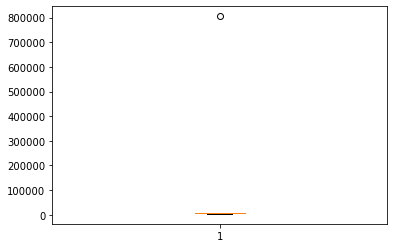

In [4]:
plt.boxplot(load_data.iloc[:,0])

In [5]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928], dtype=int64),)


In [6]:
load_data.iloc[928,0] = load_data.iloc[927,0]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2e89e10a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2e89e1760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2e89d1d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2e89e1e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2e89ec1c0>],
 'means': []}

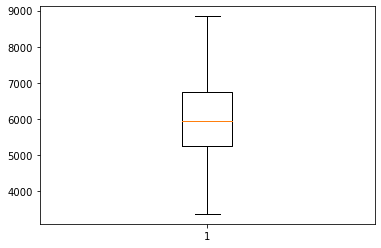

In [7]:
plt.boxplot(load_data.iloc[:,0])

In [8]:
x = []
y = []
for i in range(len(load_data.iloc[:,0])-24):
  x.append(load_data.iloc[i,0])
  y.append(load_data.iloc[i+24,0])

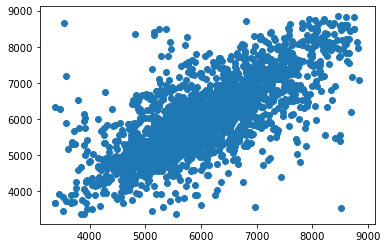

In [9]:
plt.scatter(x,y)

In [10]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))
  return -1*sum/len(d)

In [11]:
learning_rate = 0.01
epochs = 20

m = 1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9

batch_size = 400

In [12]:
x = minmax_scale(x)
y = minmax_scale(y)

In [13]:
data = []

for i in range(len(x)):
  data.append((x[i],y[i]))

print(len(data))

data_train,data_test = train_test_split(data,test_size=0.2)

len(data_train)

2159


1727

In [14]:
error_list = []
number_of_batches = (len(data_train)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = data_train[j*batch_size:]
    else:
      d = data_train[j*batch_size:(j+1)*batch_size]

    deltam = -1*learning_rate*gradm(d,m,c,v_m,v_c,momentum_coeff)
    deltac = -1*learning_rate*gradc(d,m,c,v_m,v_c,momentum_coeff)

    v_m = v_m*momentum_coeff + deltam
    v_c = v_c*momentum_coeff + deltac

    m = m + v_m
    c = c + v_c

    print("epoch {}, batch {}, error {}".format(i,j,error(d,m,c)))
    error_list.append(error(d,m,c))
  random.shuffle(data_train)

epoch 0, batch 0, error 0.4923155565250468
epoch 0, batch 1, error 0.47967295006204513
epoch 0, batch 2, error 0.44698663996720756
epoch 0, batch 3, error 0.40766120328351924
epoch 0, batch 4, error 0.3696943011485429
epoch 1, batch 0, error 0.3232620053799119
epoch 1, batch 1, error 0.28407008078852364
epoch 1, batch 2, error 0.2371648278941288
epoch 1, batch 3, error 0.19463391057829668
epoch 1, batch 4, error 0.1649162436143488
epoch 2, batch 0, error 0.13256003617069698
epoch 2, batch 1, error 0.10471952051619397
epoch 2, batch 2, error 0.07480480385679421
epoch 2, batch 3, error 0.05585992848300598
epoch 2, batch 4, error 0.04137499100695227
epoch 3, batch 0, error 0.029559949329676285
epoch 3, batch 1, error 0.021639137359721995
epoch 3, batch 2, error 0.01677645121515984
epoch 3, batch 3, error 0.011910954317651401
epoch 3, batch 4, error 0.007190320845315306
epoch 4, batch 0, error 0.010089356463883608
epoch 4, batch 1, error 0.008635000248049455
epoch 4, batch 2, error 0.01052

Text(0.5, 1.0, 'error graph')

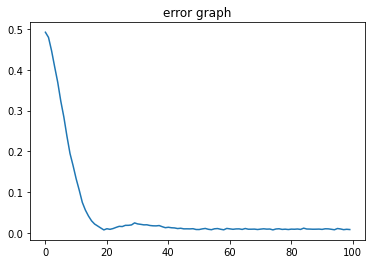

In [15]:
x1 = range(len(error_list))
y1 = error_list

plt.plot(x1,y1)
plt.title("error graph")

In [16]:
print("train error :",error(data_train,m,c))
print("test error :",error(data_test,m,c))

train error : 0.009103076709934573
test error : 0.007670540340171891


In [17]:
print(m,c)

0.6327461977365972 0.17689142046168974


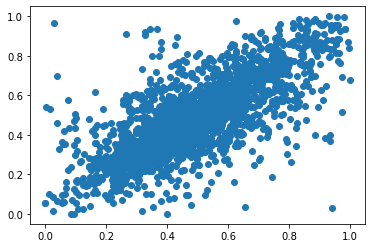

In [18]:
plt.scatter(x,y)

Text(0.5, 1.0, 'predicted line')

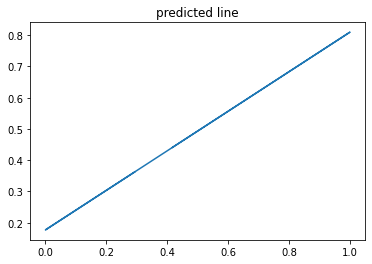

In [19]:
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)
plt.title("predicted line")

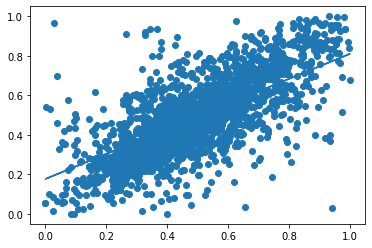

In [20]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [21]:
input_load = float(input("enter yesterday load at this time : "))

max_value = 8841.669480
min_value = 3377.919600

input_load = (input_load - min_value)/(max_value-min_value)
output_load = input_load*m+c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 3385
predicted load for this hour is :  4348.890173499041
